### Packages

In [8]:
import pandas as pd
import os, json
from pathlib import Path
import pickle
import matplotlib.pyplot as plt

In [5]:
pwd

'/Users/fabricemesidor/Documents/Flatiron School/Projects/Final-Project/Hip-Hop-Clusters/Data-Collection/Lyrics'

## What in a json file

In [6]:
#Save all json files that I have in the folder
path_to_json ='/Users/fabricemesidor/Documents/Flatiron School/Projects/Final-Project/Hip-Hop-Clusters/Data-Collection/Lyrics/json-lyrics'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
len(json_files)

56473

In [28]:
with open('lyrics_eminem_walkonwaterstanlovethewayyouliesnlmedley.json') as json_file:
    data = json.load(json_file)

In [29]:
data

{'songs': [{'title': 'Walk On Water/Stan/Love The Way You Lie (SNL Medley)',
   'album': None,
   'year': '2017-11-18',
   'lyrics': 'Walk On Water\n\n[Chorus: Skylar Grey]\nI walk on water\nBut I ain\'t no Jesus\nI walk on water\nBut only when it freezes\n\n[Verse 1: Eminem]\nWhy are expectations so high? Is it the bar I set?\nMy arms, I stretch, but I can\'t reach\nA far cry from it, or it\'s in my grasp, but as\nSoon as I grab, squeeze\nI lose my grip like the flyin\' trapeze\nInto the dark I plummet, now the sky\'s blackening\nI know the mark\'s high, butter–\nFlies rip apart my stomach\nKnowin\' that no matter what bars I come with\nYou\'re gonna harp, gripe, and\nThat\'s a hard Vicodin to swallow, so I scrap these\nAs pressure increases like khakis\nI feel the ice cracking, because—\n\n[Chorus: Skylar Grey]\nI walk on water\nBut I ain\'t no Jesus\nI walk on water\nBut only when it freezes\n\n[Verse 2: Eminem]\nIt\'s the curse of the standard\nThat the first of the Mathers discs s

In [30]:
data.keys()

dict_keys(['songs', 'artist'])

In [31]:
data['songs'][0].keys()

dict_keys(['title', 'album', 'year', 'lyrics', 'image'])

In [32]:
data['artist']

'Eminem'

In [33]:
json_files[0]

'lyrics_frankocean_trouble.json'

In [34]:
test_json = pd.read_json(json_files[876])
print(test_json.artist)
print(test_json.songs[0])

0    Method Man
Name: artist, dtype: object
{'title': 'Torture', 'album': 'Tical 2000: Judgement Day', 'year': '1998-11-10', 'lyrics': "[Intro]\nYou know? Through being humbles\nTrue Mast' on the track. Like that, you know?\nBeen in this rap game for like the past..\nFour bullets now, you know? Doing bids, yeah-yeah\nI done peeped a lotta cats come through\nCourageous cats, stray cats, ha-ha\nTop cats with top hats, you know what I'm saying?\nBut it all boils down to this: we talking lyrics\nRhymes, line for line - numero uno, who the best? I don't know\nCheck it\n\n[Verse 1]\nFlame on, I rain fire, when Johnny Storm\nI'm shocking like live wire, you have been warned\nI prolong this next chamber, to make it strong\nAnd prove all them doubters wrong\nKillin 'Em Softly with this song, adding on\nLet them toes get they tag on, dead men run no marathons\nOn my shift, shooting that gift, knowin' he snitched\nOn the telethon, running his lips, sinking the ship\nGive back what his mother gave

## Working with all json

In [22]:
# I have all my json files saved already in json_files
len(json_files)

56473

In [43]:
# I define my pandas Dataframe with the columns I want to get from the json
tracks_df = pd.DataFrame(columns=['Artist', 'Title', 'Album','Year','Lyrics'])

In [44]:
tracks_df

,Artist,Title,Album,Year,Lyrics


In [45]:
# using an index I'm saving the content of the json files
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        Artist = json_text['artist']
        Title = json_text['songs'][0]['title']
        Album = json_text['songs'][0]['album']
        Year = json_text['songs'][0]['year']
        Lyrics = json_text['songs'][0]['lyrics']
        
        # I push a list of data into the dataframe that I created earlier
        tracks_df.loc[index] = [Artist, Title, Album,Year,Lyrics]

In [46]:
# now that I have the pertinent json data in our DataFrame let's have a look
tracks_df.tail(25)

,Artist,Title,Album,Year,Lyrics
56448,50 Cent,I Get It In,Best Of,2009-01-15,"[Intro]\nYeah, Na na na na\nYeah, Na na na na\..."
56449,Ace Hood,Outro (New Beginnings),Trust the Process II: Undefeated,2018-05-11,"To a new year, man\nA happy new year\nTo more ..."
56450,Kid Cudi,Wedding Tux,Speedin’ Bullet 2 Heaven,2015-12-04,[Verse 1]\nEmotional slave slut\nShe push and ...
56451,Lupe Fiasco,You My,None,None,Fresh to def she is\nFrom her steps to her set...
56452,Chamillionaire,Call Me (Tosin Remix),None,None,C'mon... pick up man...\n[phone rings again] P...
56453,DJ Quik,Do Today,The Book of David,2011-04-19,"[DJ Quik]\nFour, three, two\n\nLet's count it ..."
56454,House of Pain,"Danny Boy, Danny Boy",House of Pain,1992-07-28,"[Verse 1: Everlast]\nPeckerwood, peckerwood, t..."
56455,Travis Scott,Pull Up*,None,None,[Lyrics from Snippet]\n\n[Verse]\nPatek on my ...
56456,Danny Brown,Let’s Go,Hot Soup,None,"[Verse 1: Danny Brown]\nAnother day, another d..."
56457,Rich The Kid,Goin Crazy,Feels Good 2 Be Rich,2014-08-15,[Hook - Rich The Kid]\nRiding round in the A\n...


In [47]:
lenght_calls = len(tracks_df)
lenght_calls

56473

In [48]:
#Drop songs with same title and same artist
tracks_df.drop_duplicates(subset =["Artist", "Title"],
                     keep = 'first', inplace = True)

In [49]:
tracks_df.reset_index(drop = True)

,Artist,Title,Album,Year,Lyrics
0,Frank Ocean,Trouble,None,2012-01-01,"Go, go, go\n\n[Verse 1]\nForbidden from the be..."
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...
2,Eminem,Walk On Water/Stan/Love The Way You Lie (SNL M...,None,2017-11-18,Walk On Water\n\n[Chorus: Skylar Grey]\nI walk...
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ..."
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...
5,50 Cent,Jerk,None,None,[50 Cent]\nNext and 50\n(Uh-huh)\nNext and 50\...
6,Das EFX,Buck-Buck,Hold It Down,1995-09-26,*Skoob and Dray giving shoutouts*\n\nChorus:\n...
7,Lil Uzi Vert,Rari,None,2016-05-23,[Hook]\nAll I ever wanted was the bitches and ...
8,Curren$y,Jets At Ya Neck,Return To The Winners Circle,None,Jet life jet life jet life jet life\n\n[Verse ...
9,Kool Moe Dee,To the Beat Y’all,Funke Funke Wisdom,1991-06-11,To the beat...\n\n(To the beat y'all\nTo the b...


In [50]:
tracks_df.head()

,Artist,Title,Album,Year,Lyrics
0,Frank Ocean,Trouble,None,2012-01-01,"Go, go, go\n\n[Verse 1]\nForbidden from the be..."
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...
2,Eminem,Walk On Water/Stan/Love The Way You Lie (SNL M...,None,2017-11-18,Walk On Water\n\n[Chorus: Skylar Grey]\nI walk...
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ..."
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...


In [51]:
len(tracks_df)

55010

In [52]:
#Find total of songs dropped
removed = lenght_calls - len(tracks_df)
removed

1463

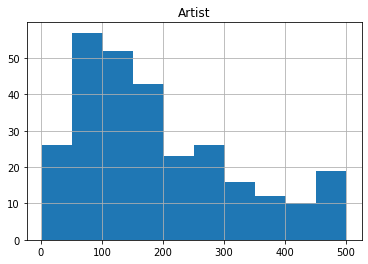

In [53]:
pd.DataFrame(tracks_df.Artist.value_counts()).hist()
plt.show()

In [54]:
#save the dataframes so I can import it when going to clean
with open('../../Data-Cleaning/tracks_df.pkl', 'wb') as f:
    pickle.dump(tracks_df, f)